實作向前計算<br>
實作修正的部分<br>
程式參考<br>
http://ihong-blog.logdown.com/posts/400961-neural-networks-artificial-nueral-network

算式參考<br>
http://cpmarkchang.logdown.com/posts/277349-neural-network-backward-propagation

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#定義常用函數
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [3]:
#準備訓練資料
x_data = np.linspace(-2, 2, 600)[:,np.newaxis]

#y_data_ori = -3 * x_data #一次函數
y_data_ori = -3 * np.power(x_data, 2) #二次函數
#y_data_ori = 2 * np.power(x_data, 3) + 4 * np.power(x_data, 2) #三次函數

y_data = y_data_ori + np.random.normal(0, 0.5, x_data.shape)

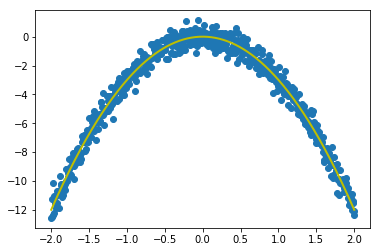

In [4]:
#顯示目前資料
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x_data, y_data) #輸入有雜訊的資料
ax.plot(x_data, y_data_ori,'y-', lw = 2) #目標函數

plt.show()

做一個 1 * 5 * 1 的組合<br>
決定有幾個變數<br>
第一層 輸入一個值<br>
第一層 到 第二層 會有 5個w 5個b<br>
第二層 到 第三層 會有 5個w 5個b<br>

In [5]:
#初始值
w12 = np.linspace(1,2,5)
b12 = np.linspace(1,2,5)
w23 = np.linspace(1,2,5)
b23 = 0.3

#學習速率
learning_rate = 0.01

In [6]:
index = 0
while index < x_data.size * 10:
        
    map_index = np.random.randint(x_data.size)# (index * 7) % x_data.size #乘上某個倍數打破資料的順序性
    
    #進行各值的運算
    x_input = x_data[map_index]
    
    sum1 = x_input * w12 + b12
    active1 = sigmoid(sum1)
    sum2 = np.sum(active1 * w23 + b23)
    active2 = sum2
    
    hat_y = active2
    real_y = y_data[map_index]
    
    #準備BP for w23 b23
    delta_23 = 2 * (hat_y - real_y)
    gradient_w23 = delta_23 * active1
    gradient_b23 = delta_23
    
    #準備BP for w12 b12
    delta_12 = delta_23 * w23 * sigmoid_prime(sum1)
    gradient_w12 = delta_12 * x_input
    gradient_b12 = delta_12
    
    #更新
    w23 = w23 + (gradient_w23 * -1 * learning_rate)
    b23 = b23 + (gradient_b23 * -1 * learning_rate)
    w12 = w12 + (gradient_w12 * -1 * learning_rate)
    b12 = b12 + (gradient_b12 * -1 * learning_rate)
    
    index = index + 1

In [7]:
new_y = np.zeros((600, 1))

index = 0
while index < x_data.size:
    
    x_input = x_data[index]
    sum1 = x_input * w12 + b12
    active1 = sigmoid(sum1)
    sum2 = np.sum(active1 * w23 + b23)
    new_y[index] = sum2
    
    index = index + 1

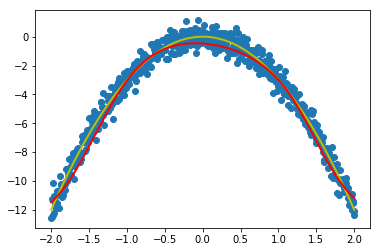

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x_data, y_data)
ax.plot(x_data, y_data_ori,'y-', lw = 2)
ax.plot(x_data, new_y,'r-', lw = 2)

plt.show()